# Project 2D - Vincent Kuai

### Scientific Question: My scientific question is asking how does the alcohol dehydrogenase protein that is associated with flavor/aroma of the Piedmont White Truffle(Tuber Magnatum) compare to other similar truffles such as the Black Périgord Truffle?

Truffles are a fungal food item sold at lucratively high prices and coveted for their unique aroma and flavor. Some of the more well-known truffles are the Piedmont White Truffle (Tuber Magnatum) and the Black Périgord Truffle (Tuber Melanosporum). The cause of the unique flavor/aroma of these truffles have been found to be influenced by multiple factors such as the genes, proteins, microbiology, and even the geography of the truffles. In a 2008 paper by Gioacchini, they found that the smell/volatiles of the truffles differed depending on the environment and then in a 2020 paper by Vita et. al they linked specific molecules to their environment. While the environment has been shown to affect the aroma of the truffles, another significant factor that will be looked at in more detail is the genetic factor to flavor/aroma of the truffles. In this project, the focus will mostly be on the impact of proteins and the variability of the alcohol dehydrogenase protein between Tuber Magnatum and Tuber Melanosporum.

In the research paper by Islam et. al in 2013, the found nine putative proteins that were indicative of the unique aroma/flavor of the Tuber Melanosporum. Of the nine proteins found, one of them was annotated as being an alcohol dehydrogenase. The nine proteins were identified by using a combination of BLAST and functional annotation. In a paper by Murat et. al in 2018, one of the proteins annotated as being part of the metabolic pathway in Tuber Magnatum was an alcohol dehydrogenase. So, this project looks at these two alcohol dehydrogenase proteins and how similar they are in sequence, while also using an alcohol dehydrogenase from Saccharomyces Cerevisiae as a negative control.

The database used for the Tuber Magnatum was found extracted from ncbi through the research paper by Murat et. al in 2018. The database for Tuber Melanosporum was taken from ebi and was from the research paper by Islam et. al in 2013. The database for Saccharomyces Cerevisiae was found through ncbi by Young et. al.


### Hypothesis: My refined scientific hypothesis is: If the unique aroma of the Tuber Magnatum is influenced by the alcohol dehydrogenase enzyme, then the alcohol dehydrogenase enzyme in the Tuber Magnatum will be unique/different in protein sequence from the one in Tuber Melanosporum.

The FASTA files of alcohol dehydrogenase from each truffle was first saved in their own txt file. This is where the Bioinformatics begins with the sequences each being coded into one txt file that contained all the FASTA files titled "Proteins_Total."

First, the file of "Proteins_Total" needed gaps added to some of the sequences, because each sequence needed to be the same length for multiple sequence alignment to properly run. This new fasta file with each protein and gaps added was titled "New_Proteins_Total" was then used to preform multiple sequence alignment on to see the alignment of each sequence together. The multiple sequence alignment was then printed out to be able to visually see the sequence alignment. Then, pairwise sequence alignment was individually done between Tuber Magnatum and Tuber Melanosporum and Tuber Magnatum and Saccharomyces Cerevisiae to see the those pairs matched up in sequences. Pairwise sequence alignment was also done using the "Proteins_Total" to receive the pairwise scores that would then be used in the heatplot. 

Afterwards the visualization of the heatplot was made based on the scores from the pairwise sequence alignment done with the "Proteins_Total". This heatplot further showed the similarity of each protein sequence from each other by showing a visualization of each pairwise score being assigned a color in the heatplot according to its pairwise score number.

The protein sequences for Tuber Magnatum and Saccharomyces Cerevisiae was found through the NCBI database and the protein sequence for Tuber Melanosporum was taken from the EBI database.


### Loading the Packages

- Biopython: Biopython has a wide variety of computational tools for molecular biology analysis. Within Biopython there are some useful subpackages and modules such as AlignIO and SeqIO which can be used to do sequence alignments. Biopython has the capability to parse through many different types of file formats and also has access to different online services. There are also tools within Biopython that enable the user to perform operations such as translation, and transcription. The package also has a sequence database schema called BioSQL. The Biopython package also has code that is able to split up tasks that can be done in parallel to be done in separate processes.  More information on the Biopython package can be found here: http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec2
- NumPy: NumPy is a python package that provides a wide variety of useful tools such as multidimensional arrays, various derived objects, and ways to perform mathematical analysis on the arrays. The main use of NumPy is for its ndarray object feature which allows creation of ndimensional arrays of data types. It is also worth noting that the numpy array created is different from the standard sequences made from Python. One significant NumPy feature is its vectorization which removes explicit looping, indexing, and such to be in pre-Complied C code. Another feature of NumPy is its broadcasting which describes the package's ability to handle operations in an element by element manner. More information about numpy can be found here: https://numpy.org/doc/stable/user/whatisnumpy.html
- Matplotlib: Matplotlib is a python package mainly for visualization of plots. This package is able to support the figures created by embedding it into a GUI window. Matplotlib has the capability to make a wide variety of different plots based on NumPy arrays or other types of datasets. Some example plots that can be created are: histograms, scatter plots, bar graphs, box plots, pie charts, and much more. The plots can be edited in a variety of ways such as changing axis, color, size, etc. Matplotlib is also capable of creating documents in many different formats of the plots. This package also offers some flexibility in being able to reduce the rendering time in exchange for a change in the plot's appearance. More information can be found here: https://matplotlib.org/stable/users/explain/index.html

### Importing the Packages

In [18]:
import Bio
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO 
import numpy as np
import matplotlib.pyplot as plt

### Loading in the Data

The Data here are all fasta sequences that have been copied into txt files. Fasta sequences are a sequence file format that being with the id of the sequence in a ">" format and this is then followed by the actual sequence in the next line. They are then being read in using the sub package of SeqIO from Biopython. Also, they are also being stored into another variable where it is just the sequence itself without the id which will be useful for the Pairwise that will be done later in this project. The Data is also all coded into being in one txt file with all the protein fasta sequences in it. Another txt file with all the protein fasta sequences is also made with gaps so that each protein is the same length. The fasta sequences for Tuber Magnatum and Saccharomyces Cerevisiae are taken from ncbi and the sequence for Tuber Melanosporum is taken from ebi.

In [7]:
# reading the fasta file for Tuber Magnatum and storing it into a global variable
# fasta sequence is from: https://www.ncbi.nlm.nih.gov/protein/PWW78292.1  
# fasta sequences were added a .seq at the end so that the pairwise is only performed on the seqeunces and not the entire fasta file
Tuber_Magnatum_protein = SeqIO.read("Tuber_Magnatum_Alcohol_Dehy", "fasta")
Tuber_Magnatum_protein_seq = Tuber_Magnatum_protein.seq

In [8]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Tuber_Magnatum_protein)

In [9]:
# Reading and storing the fasta file for Tuber Melanosporum into a global variable
# fasta sequence is from: http://fungi.ensembl.org/Tuber_melanosporum/Gene/Summary?g=GSTUM_00006862001;r=FN430208:1435572-1437530;t=CAZ83243;db=core 
Tuber_Melanosporum_protein = SeqIO.read("Tuber_Melanosporum_Alcohol_Dehy", "fasta")
Tuber_Melanosporum_protein_seq = Tuber_Melanosporum_protein.seq

In [10]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Tuber_Melanosporum_protein)

In [11]:
# Storing the fasta file for Saccharomyces Cerevisiae into a global variable
# https://www.ncbi.nlm.nih.gov/protein/AAA34411.1 
Saccharomyces_Cerevisiae_Protein = SeqIO.read("Saccharomyces_Cerevisiae_Alcohol_Dehy", "fasta")
Saccharomyces_Cerevisiae_Protein_seq = Saccharomyces_Cerevisiae_Protein.seq

In [12]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Saccharomyces_Cerevisiae_Protein)

In [13]:
# Combining fasta files into one txt file
# It is necessary to have all the sequences in one txt file for Multiple Seq and Pairwise alignment

# Empty lists to store the headers of the fasta files into headerList and the sequence data into seqList
# The headerList will store the header of the fasta sequences
# The seqList will store the sequences of the fasta sequences
#https://www.biostars.org/p/18129/
headerList = []
seqList = []

#Data from Tuber Magnatum being sorted and put into the headerList and seqList
Tuber_Magnatum_fasta = open('Tuber_Magnatum_Alcohol_Dehy','r')
for record in SeqIO.parse(Tuber_Magnatum_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))
    
#Data from Tuber Melanosporum being sorted and put into the headerList and seqList
Tuber_Melanosporum_fasta = open('Tuber_Melanosporum_Alcohol_Dehy','r')
for record in SeqIO.parse(Tuber_Melanosporum_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))

#Data from Saccharomyces Cerevisiae being sorted and put into the headerList and seqList
Saccharomyces_Cerevisiae_fasta = open('Saccharomyces_Cerevisiae_Alcohol_Dehy','r')
for record in SeqIO.parse(Saccharomyces_Cerevisiae_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))

#creating a txt file of all the proteins in it titled "Proteins_Total"
#https://www.biostars.org/p/142519/ 
ofile = open("Proteins_Total", "w")
# for loop is started to iterate the proteins into the file "Proteins_Total"
for i in range(len(seqList)):
    # txt file is including the > since it's a fasta sequence and also the headerList and seqList
    ofile.write(">" + headerList[i] + "\n" + seqList[i] + "\n")
ofile.close()

# code check
# check to see that the header of each fasta sequences was correctly put into the list
# print(headerList)
# check to see that the sequences of each protein was cocrrectly put into the list
# print(seqList)

# Creating GAPs so that each protein is the same length, then putting all this into a new txt file titled "New_Proteins_Total"
# Each protein needs to be the same length for the Multiple Sequence alginment to properly work
# https://stackoverflow.com/questions/64477731/padding-short-sequences-with-gaps-using-biopython

# Creating a variable to store the data of all the proteins sequences/headers id from the previous fasta file
sequences = [s for s in SeqIO.parse('Proteins_Total', 'fasta')]
#code check that proteins are properly stored into variable sequences
# print(sequences)

# Making the smaller protein sequences match the longest protein sequences by adding in gaps to the ends of the shorter protein sequences
max_len = max([len(s.seq) for s in sequences])
GAPs = "-"


# Using a for loop to iterate the gaps onto the shorter sequences
for seq in sequences:
    padding = GAPs*(max_len - len(seq.seq)) 
    seq.seq += padding
# Writing a new fasta file titled "New_Proteins_Total" to store all the protein sequences together with the gaps added on
SeqIO.write(sequences, 'New_Proteins_Total', 'fasta')

3

### Multiple Sequence Alignment

Multiple Sequence Alignment is when multiple sequences are taken and aligned together so that one can visually see how multiple sequences look compared to one another. This method is useful to spot differences and similarities from just looking at the sequences itself. Here, I have the three protein sequences visually represented. The multiple sequence alignment here utilizes AlignIO which is a subpackage of Biopython.

In [14]:
# Fasta file with all the proteins in appropiate sizes are stored into variable
alignment = AlignIOalignment = AlignIO.read(open("New_Proteins_Total"), "fasta")

# Printing out the alignment lengh total at the top
print("Alignment length %i" % alignment.get_alignment_length())

# Showing a printout of each protein sequences and their id
for record in alignment:
    print(record.seq + " " + record.id)

Alignment length 379
MSSTEGKTITCKAAVAWEPGKPLSIEEIEVAPPRGHEVRIKIHYTGVCHTDAYTLSGKDPEGAFPIVLGHEGAGTVESIGEGVTNVKVGDHVVALYTPECRECKFCKSGKTNLCGKIRATQGKGVMPDGTSRFRAKGKDLLHFMGTSTFSQYTVVADISVVAITYDVSMEKTCLLGCGITTGYGAAVVTAGVENGSTVAVFGAGCVGLSVIQGAVKCGASKIIVVDVNDKKEEWGKRFGATHFVNPSKIGSQTIQEKLIEMTDGGLDYTFDCTGNVQVMRAALEACHKGWGQSIVIGVAAAGQEISTRPFQLVTGRVWKGCAFGGIKGRTQLPDLVRDYMEGKLKVDEFITHREPLGQINNAFDQMKVGDCIRCVVNMQ PWW78292.1
MSVPTEQYAQVFKSNNDPIERKKVPVSKPGPDEVLVNIKYTGVCHTDLHAWKGDWPLQTKQNLIGGHEGAGVVVAVGELVKDIKVGDHAGIKWINGSCGHCEFCMAGDEPLCTNALLSGYTVDGSFQQYAIGKAVDVARIPKGVPLDAVAPILCAGITVYKALKESQARAGQTIAIVGAGGGLGSLAVQYAKAMGFRVIAIDTGSEKQEMCLNVLGAEEYVDFAKEDVGAKVKSITGGLGAHAVILLAVSEKPFQHATEYCRAHGTVVCVGLPAKARISAEVFPTVIRMITIKGSYVGNRIDTHEAIDFFARGLIKAPFKVGKLSELPQVFKLMEEGKIAGRYVLDTSK------------------------------ GSTUM_00006862001:CAZ83243
MSIPETQKAIIFYESHGKLEHKDIPVPKPKANELLINVKYSGVCHTDLHAWHGDWPLPTKLPLVGGHEGAGVVVGMGENVKGWKIGDYAGIKWLNGSCMACEYCELGNESNCPHADLSGYTHDGSFQEYATADAVQAAHIPQGTDLAEVAPILCAGITVYKALKSANLRAGHWAAISGAAG

### Pairwise Sequence Alignment

Pairwise sequence alignment is when a pair of sequences are aligned together and then given a score based on how similar in sequences they are. This method is useful to see how similar and different two sequences are from each other. In this project I use pairwise sequence alignment to look at each pair of proteins against each other. The resulting score is then determined by matches being given 1 point and everything else given no points. The pairwise function here is from a module of Biopython

In [15]:
# Pairwise between Tuber Magnatum with Tuber Melanosporum
# Performing global alignment between the two sequences
# Match given +1, else 0
# No gap penalty
Magnatum_Melanosporum = pairwise2.align.globalxx(Tuber_Magnatum_protein_seq, Tuber_Melanosporum_protein_seq)
# code check for pairwise
# print(format_alignment(*Magnatum_Melanosporum[0]))

In [16]:
# Pairwise between Tuber Magnatum and Saccharomyces Cerevisiae-Negative Control
Magnatum_Saccharomyces = pairwise2.align.globalxx(Tuber_Magnatum_protein_seq, Saccharomyces_Cerevisiae_Protein_seq)
# code check for pairwise
# print(format_alignment(*Magnatum_Saccharomyces[0]))

### Heatplot 

A heatplot is a method of visualizing data. A heatplot is able to represent each data value within an array and assign it a specific color inside of a box. This color is determined by how high or low the value is and this can be seen on the color bar axis. In a heatplot the values along the diagonal will typically be the highest value possible because it is showing when the inputs are matching with itself. In this project, a heatplot is used to show analysis between multiple sequences to see if there is a large similarity between some of sequences. A heatplot can be especially useful if the dataset is very large and there are many sequences to be analyzed at once for sequence similarity. Here, I have heatplot to visualize the sequence similarity of the three proteins using data from pairwise sequence alignment. The creation of the heatplot here utilizes the package matplotlib.

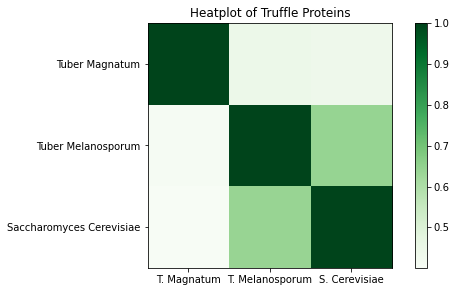

In [17]:
# Creating a Heatplot based on pairwise data
# Code is from challenge problem 4 : https://canvas.ucsd.edu/courses/29418/files/5721198?module_item_id=1126617&fd_cookie_set=1 
# Storing fasta data of all three proteins into the variable "Fasta"
Fasta = list(SeqIO.parse("Proteins_Total", "fasta"))

#measuring the size of the sequences and storing into variable "size"
size = len(Fasta)

#creating local variables i and j for for loop
i = 0
j = 0

#creating an empty matrix for the size of the fasta file and storing into a global variable
alignments_score = np.empty(shape=(size,size))

#Creating a fucntion: Nested for loop to do pairwise sequence alignment for each pair of the proteins
def pairwise_seq_heatmap(my_numpy_array, size):
    for i in range(size):
        for j in range(size):
        # Define two sequences into local variables, to be aligned as sequences
            X = Fasta[i].seq
            Y = Fasta[j].seq
            #code check to see if the proper protein sequences are being aligned
            #print(Fasta[i].id)

        # Get a list of the global alignments
        # No parameters. Matches have score of 1, else 0.
        # No gap penalties.
        # Uses score_only function so that only the pairwise scores from the pairwise sequence alignment are being used for the heatplot
        # performing pairwise and storing into the numpy matrix
            my_numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))
    
    #ends the for loop
    return my_numpy_array

# Check that the for loop correctly created the matrix
My_Alignment_Scores = pairwise_seq_heatmap(alignments_score, size)
#code check
#check that the alignment scores are palced correctly
# print(My_Alignment_Scores)

# Normalizing the data to accomodate for each sequence being different sequence lengths
# Normalizing is done by dividing each column in the numpy array by the highest value
# The new numpy array of the normalized values is then stored in the global variable of "alignments_score"
alignments_score = My_Alignment_Scores / np.max(My_Alignment_Scores, axis=0)
# code check
# check to see the numpy matrix is properly made and can also see the specific values in each box in the heatplot 
# print(alignments_score)

# Creating subplot of the color bar to the right of the heatplot
fig, ax = plt.subplots()

# Showing the heatplot based on the pairwise scores
plt.imshow(alignments_score)

# Construct the heat map to show the axes
# To change color to only green: https://stackoverflow.com/questions/49530746/python-heatmap-change-colour-map-and-make-asymmetrical
im = ax.imshow(alignments_score, cmap='Greens')

# Add a colorbar to the right of the heatmap to represent what each color means in terms of pairwise score
# One thing to note here is that the color bar only shows one color for pariwise scores of 0-0.5
cbar = ax.figure.colorbar(im)

# Setting the axis of the heatplot correctly
# code from: https://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points

# Creating global variables x and y to make the ticks on the x and y axis of the heatplot
# This is then stored as a numpy array
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

# X and Y ticks are global variables that each have a list of what the labels should be for them on the x and y axis
xticks = ['T. Magnatum', 'T. Melanosporum', 'S. Cerevisiae']
yticks = ['Tuber Magnatum', 'Tuber Melanosporum', 'Saccharomyces Cerevisiae']

# Plotting the x and y tick labels on the x and y axis
plt.xticks(x, xticks)
plt.yticks(y, yticks)

# Adding in a title for the Heatplot
ax.set_title('Heatplot of Truffle Proteins')

# Increasing the Heatplot size so that it is more visible and easier to read
# code for changing the size of the Heatplot: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib 
fig.set_size_inches(8, 4.5, forward=True)

# Show the plot
plt.show()


### Analysis of Result

In the heatplot shown above each box represents a similarity scoring value that was taken from the pairwise sequence alignment.  The measurements on the color bar are measuring the ratio of pairwise similarity. So, all along the diagonal are perfect matches because the sequences are being aligned to themselves and so the scores are 1.0. It's important to note here that there is only a single color that represents 0 to 0.5 whereas 0.5 to 1.0 has a gradient of color representing it. Along the sides, where the colors are lighter shows how the sequence of the protein from Tuber Magnatum is aligning to the Tuber Melanosporum and Saccharomyces Cerevisiae protein. The Tuber Magnatum is showing comparatively low alignment when being compared to both the Tuber Melanosporum and the Saccharomyces Cerevisiae protein. This shows that the Tuber Melanosporum is more similar in sequence to Saccharomyces Cerevisiae than either is to the Tuber Magnatum. Another thing to note is that the Tuber Magnatum is showing similar sequence similarity when compared to the Tuber Melanosporum and the Saccharomyces Cerevisiae protein. In both cases the Tuber Magnatum is showing a bit below a 0.5 sequence similarity which is still a high similarity score. Since the sequence of the Tuber Magnatum is shown here to be as similar to the Tuber Melanosporum as to the Saccharomyces Cerevisiae, it is possible to conclude that the alcohol dehydrogenase enzyme in the Tube Magnatum is not a unique sequence in the truffle species. So, I reject my hypothesis since the alcohol dehydrogenase enzyme is not significantly different when compared to the Tuber Melanosporum and the Saccharomyces Cerevisiae. One thing to note is that it is possible that the alcohol dehydrogenase along with other proteins together can still contribute to the unique aroma of the Tuber Magnatum. However, the alcohol dehydrogenase enzyme is likely not the sole contributor to the unique aroma of the Tuber Magnatum truffle since the sequence itself is not very unique when compared to other alcohol dehydrogenase enzyme in other species.

### References

Murat et. al, 2018 : https://www.nature.com/articles/s41559-018-0710-4

Islam et. al, 2013 : https://pubs.acs.org/doi/10.1021/pr400650c

Young et. al : https://pubmed.ncbi.nlm.nih.gov/6279086/

Vita et. al, 2020 : https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-020-6522-3

Gioacchini et. al, 2008 : https://pubmed.ncbi.nlm.nih.gov/18798200/